# Week 06: Business Statistics & Analytics - E-commerce Analysis

## Learning Objectives
By the end of this exercise, you will be able to:
- Calculate key business metrics using pandas
- Create meaningful visualizations for business insights
- Apply statistical concepts to real business scenarios
- Make data-driven recommendations

---

## Business Context

You're working as a Data Analyst for **TechMart**, an e-commerce company. Your manager needs insights from last quarter's sales data to inform strategic decisions for the upcoming quarter.

Your analysis will help answer critical questions about customer behavior, regional performance, and product trends that directly impact business growth.

## Dataset Setup

First, let's generate the synthetic dataset you'll be analyzing:

In [45]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


# Set random seed for reproducible results
np.random.seed(42)

# Generate 500 orders from 2023
n_orders = 500

# Create order IDs and customer data
order_id = np.arange(1, n_orders + 1)
customer_id = np.random.randint(1, 101, size=n_orders)
customer_segment = np.random.choice(["Student", "Professional", "Senior"], size=n_orders, p=[0.4, 0.4, 0.2])
region = np.random.choice(["North", "South", "East", "West"], size=n_orders)
order_date = pd.date_range(start="2023-01-01", periods=n_orders, freq="D")
product_category = np.random.choice(["Electronics", "Clothing", "Books", "Home", "Sports"], size=n_orders)
quantity = np.random.randint(1, 5, size=n_orders)
unit_price = np.round(np.random.uniform(10, 200, size=n_orders), 2)
revenue = quantity * unit_price
discount_applied = np.random.choice([0, 5, 10, 15, 20, 25, 30], size=n_orders, p=[0.5,0.1,0.1,0.1,0.05,0.05,0.1])
payment_method = np.random.choice(["Credit Card", "PayPal", "Gift Card", "Debit Card"], size=n_orders)

# Build dataframe
df = pd.DataFrame({
    "order_id": order_id,
    "customer_id": customer_id,
    "customer_segment": customer_segment,
    "region": region,
    "order_date": order_date,
    "product_category": product_category,
    "quantity": quantity,
    "unit_price": unit_price,
    "revenue": revenue,
    "discount_applied": discount_applied,
    "payment_method": payment_method
})

# Save dataset for reference
df.to_csv("ecommerce_data.csv", index=False)
print("✅ Dataset created successfully!")

# Display first few rows
df.head()

✅ Dataset created successfully!


,order_id,customer_id,customer_segment,region,order_date,product_category,quantity,unit_price,revenue,discount_applied,payment_method
0,1,52,Student,North,2023-01-01,Clothing,1,42.43,42.43,0,Debit Card
1,2,93,Student,West,2023-01-02,Sports,1,24.18,24.18,0,Gift Card
2,3,15,Professional,East,2023-01-03,Sports,3,158.71,476.13,0,Debit Card
3,4,72,Student,East,2023-01-04,Sports,1,60.42,60.42,0,Credit Card
4,5,61,Student,West,2023-01-05,Books,3,43.78,131.34,0,Gift Card


## Data Exploration

Let's start by understanding our dataset:

In [46]:
# Load the data
data = pd.read_csv("ecommerce_data.csv")

# Basic information about the dataset
print("Dataset Info:")
print(data.info())
print("\nDataset Shape:", data.shape)
print("\nFirst few rows:")
data.head()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_id          500 non-null    int64  
 1   customer_id       500 non-null    int64  
 2   customer_segment  500 non-null    object 
 3   region            500 non-null    object 
 4   order_date        500 non-null    object 
 5   product_category  500 non-null    object 
 6   quantity          500 non-null    int64  
 7   unit_price        500 non-null    float64
 8   revenue           500 non-null    float64
 9   discount_applied  500 non-null    int64  
 10  payment_method    500 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 43.1+ KB
None

Dataset Shape: (500, 11)

First few rows:


,order_id,customer_id,customer_segment,region,order_date,product_category,quantity,unit_price,revenue,discount_applied,payment_method
0,1,52,Student,North,2023-01-01,Clothing,1,42.43,42.43,0,Debit Card
1,2,93,Student,West,2023-01-02,Sports,1,24.18,24.18,0,Gift Card
2,3,15,Professional,East,2023-01-03,Sports,3,158.71,476.13,0,Debit Card
3,4,72,Student,East,2023-01-04,Sports,1,60.42,60.42,0,Credit Card
4,5,61,Student,West,2023-01-05,Books,3,43.78,131.34,0,Gift Card


Monthly Revenue:
month
2023-01    6626.66
2023-02    6796.03
2023-03    8960.10
2023-04    7713.47
2023-05    7266.80
2023-06    7982.47
2023-07    7981.65
2023-08    6664.64
2023-09    9708.06
2023-10    7287.27
2023-11    8795.85
2023-12    8119.44
2024-01    7268.59
2024-02    8388.91
2024-03    6835.73
2024-04    7430.29
2024-05    4314.71
Freq: M, Name: revenue, dtype: float64


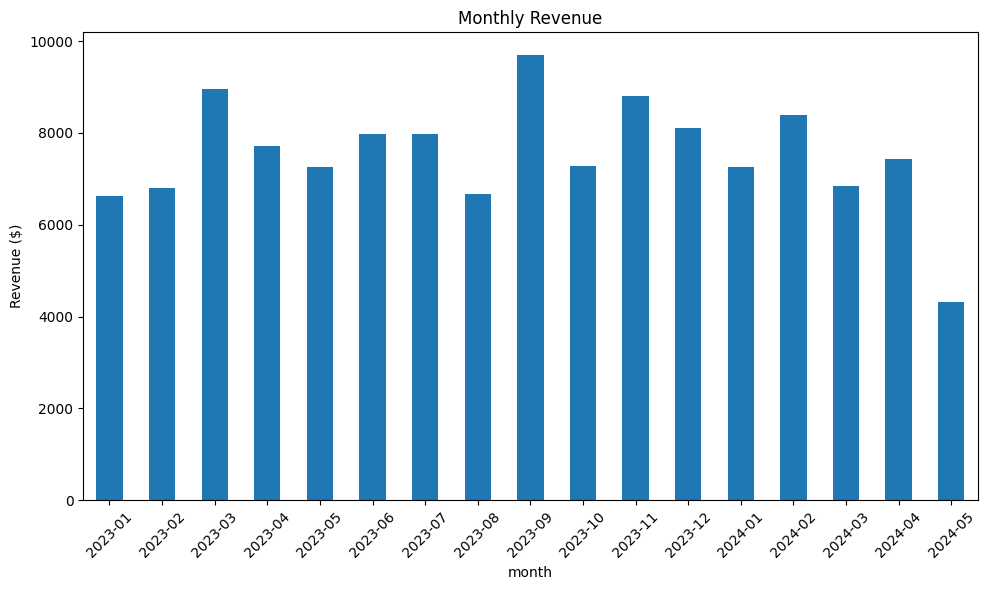

In [47]:
# Convert order_date to datetime and add helpful columns
data["order_date"] = pd.to_datetime(data["order_date"])
data["month"] = data["order_date"].dt.to_period("M")
data["day_of_week"] = data["order_date"].dt.day_name()

# Example: Revenue by month
monthly_revenue = data.groupby("month")["revenue"].sum()
print("Monthly Revenue:")
print(monthly_revenue)

# Plot monthly revenue
monthly_revenue.plot(kind="bar", figsize=(10,6), title="Monthly Revenue")
plt.ylabel("Revenue ($)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

---

## Business Questions

Now answer each of the following business questions. Use the starter code above as a reference, and expand your analysis to solve all questions.

In [48]:
# Label quarters to allow for granular analyses of revenue changes over financially relevant time frames, ie fiscal quarters, to get a better sense of overall temporal trends regarding company revenue

# Determine fiscal quarters - apparently there are different ways of dividing up the year into fiscal quarters and the labels for Q1-Q4 vary by company. For the sake of this project, the year has been divided into four parts with the 
# first quarter being Jan 1 - Mar 31, etc.
def quarter_mapper(dt):
    if pd.to_datetime(f"{dt.year}-01-01") <= dt <= pd.to_datetime(f"{dt.year}-03-31"):
        return "Q1"
    elif pd.to_datetime(f"{dt.year}-04-01") <= dt <= pd.to_datetime(f"{dt.year}-06-30"):
        return "Q2"
    elif pd.to_datetime(f"{dt.year}-07-01") <= dt <= pd.to_datetime(f"{dt.year}-09-30"):
        return "Q3" 
    else: # pd.to_datetime(f"{dt.year}-10-01") <= dt <= pd.to_datetime(f"{dt.year}-12-31"):
        return "Q4"

earliest_year = data["order_date"].min().year
lastest_year = data["order_date"].max().year
data["quarter"] = data["order_date"].apply(lambda x: f"{x.year}{quarter_mapper(x)}")
data["quarter"].value_counts()

# Only the most recent full quarter is used in the analyses included in this project.

quarter
2023Q4    92
2023Q3    92
2024Q1    91
2023Q2    91
2023Q1    90
2024Q2    44
Name: count, dtype: int64

### 1. Revenue Overview
What was the company's total revenue last quarter? Break it down by month.

**Revenue increased then decreased over the first quarter of the most recent year which is not consistent with the pattern of the previous year.**

In [49]:
# Calculate total revenue per order, which is defined as the revenue based on unit price and quantity deducted by the discount represented as a percent
data["total_revenue"] = (100 -  data["discount_applied"]) * data["revenue"]

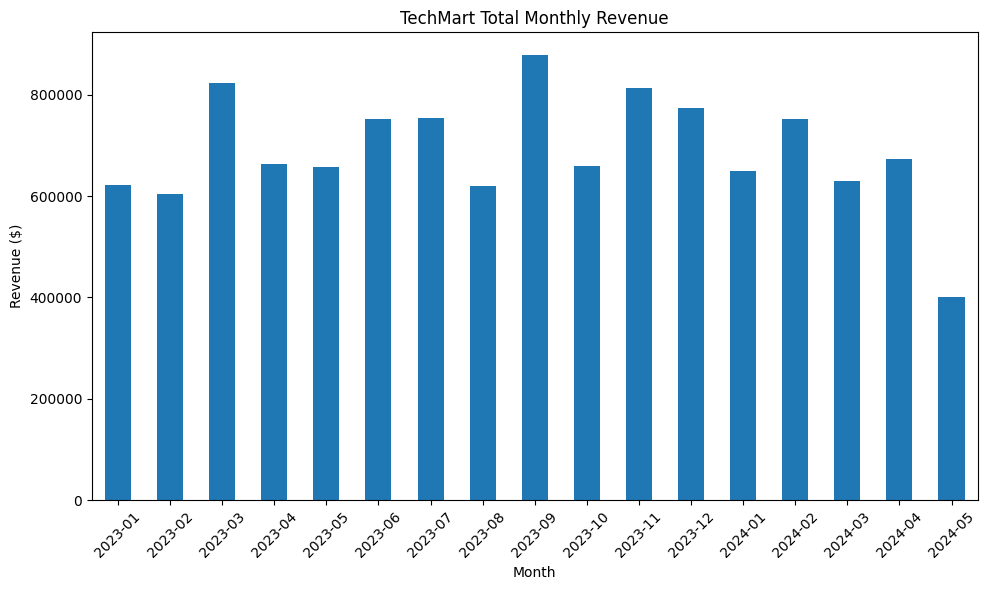

*** Overall Revenue Report ***
Total orders: 500
Total revenue: $11,727,112.55

Breakdown by month:
month
2023-01    622274.85
2023-02    604187.80
2023-03    823124.85
2023-04    663392.65
2023-05    656974.00
2023-06    751490.55
2023-07    753479.20
2023-08    618886.50
2023-09    879081.95
2023-10    659339.25
2023-11    813486.00
2023-12    774201.05
2024-01    649850.00
2024-02    752742.35
2024-03    630322.25
2024-04    672550.25
2024-05    401729.05
Freq: M, Name: total_revenue, dtype: float64


In [50]:
# Overall revenue
monthly_revenue = data.groupby("month")["total_revenue"].sum()
monthly_revenue.plot(x="month", y="total_revenue", kind="bar", figsize=(10,6), title="TechMart Total Monthly Revenue")
plt.ylabel("Revenue ($)")
plt.xlabel("Month")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("*** Overall Revenue Report ***")
print(f"Total orders: {len(data)}")
print(f"Total revenue: ${monthly_revenue.sum():,}")
print("\nBreakdown by month:")
print(monthly_revenue)

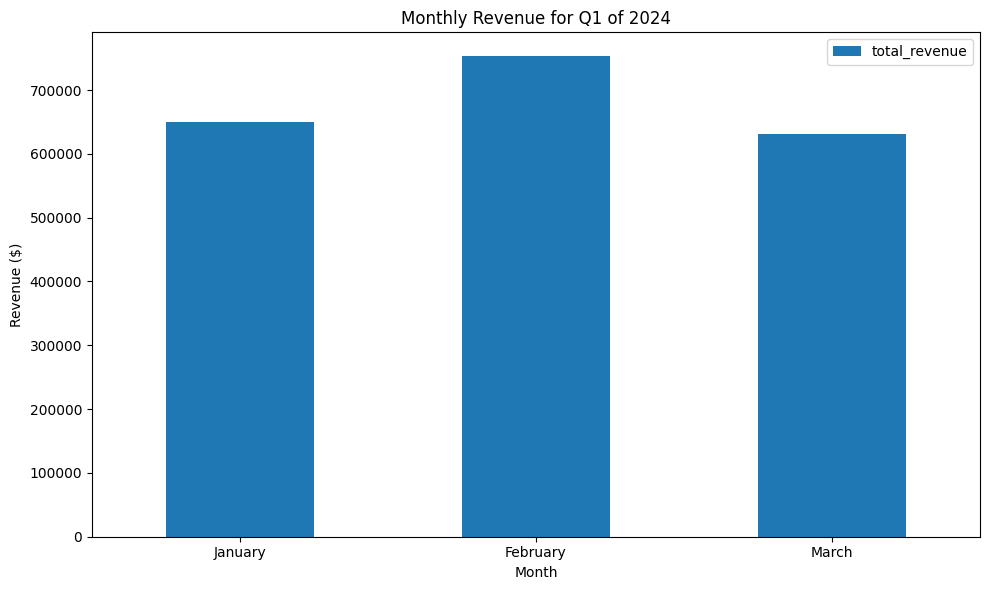

*** Q1 Revenue Report ***
Total sales: 91
Total revenue: $2,032,914.6

Breakdown by month:
  month_name  total_revenue
0    January      649850.00
1   February      752742.35
2      March      630322.25


In [51]:
# Last full financial quarter consists of Jan 1 - March 31 of 2024
quarter_data = data[data["quarter"] == "2024Q1"]
quarter_monthly_revenue = quarter_data.groupby("month")["total_revenue"].sum().reset_index()
quarter_monthly_revenue["month_name"] = quarter_monthly_revenue["month"].dt.strftime("%B")

quarter_monthly_revenue.plot(x="month_name", y="total_revenue", kind="bar", figsize=(10,6), title="Monthly Revenue for Q1 of 2024")
plt.ylabel("Revenue ($)")
plt.xlabel("Month")
plt.xticks(rotation=360)
plt.tight_layout()
plt.show()

print("*** Q1 Revenue Report ***")
print(f"Total sales: {len(quarter_data)}")
print(f"Total revenue: ${quarter_monthly_revenue["total_revenue"].sum():,}")
print("\nBreakdown by month:")
print(quarter_monthly_revenue[["month_name", "total_revenue"]])

### 2. Top Customers
Who are the top 5 customers by total revenue contribution?

**One of the top 5 revenue contributors is a statistical outlier, with the remaining 4 falling between the min and max. The difference in contribution generally increases as total contribution increases.**

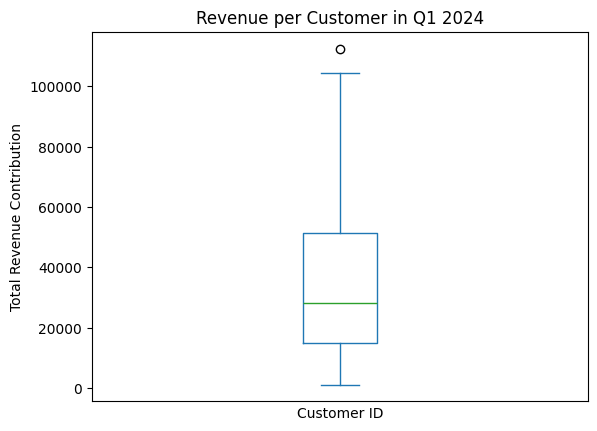

In [52]:
revenue_by_customer = quarter_data.groupby("customer_id")["total_revenue"].sum().reset_index()
revenue_by_customer.plot(kind="box", x="customer_id", y="total_revenue")
plt.title("Revenue per Customer in Q1 2024")
plt.xlabel("Customer ID")
plt.xticks([])
plt.ylabel("Total Revenue Contribution")
plt.show()

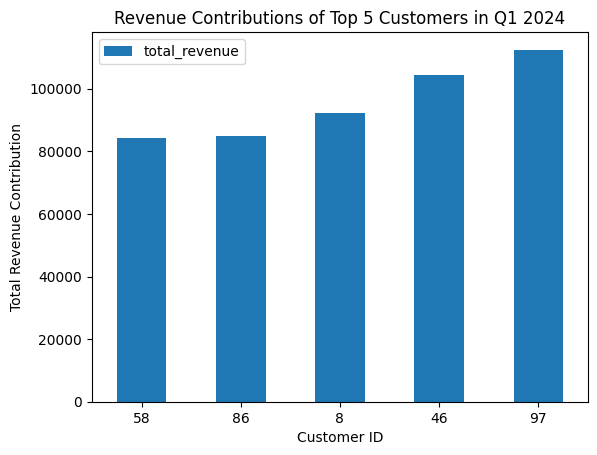

In [53]:
top_customers = revenue_by_customer.nlargest(5, columns="total_revenue").sort_values(by="total_revenue")
top_customers.plot(kind="bar", x="customer_id", y="total_revenue")
plt.title("Revenue Contributions of Top 5 Customers in Q1 2024")
plt.xlabel("Customer ID")
plt.xticks(rotation=360)
plt.ylabel("Total Revenue Contribution")
plt.show()

In [54]:
print(top_customers)

    customer_id  total_revenue
38           58        84170.9
48           86        84891.3
3             8        92343.0
28           46       104479.6
54           97       112452.8


### 3. Segment Analysis
Which customer segment (Student, Professional, Senior) spends the most on average per order?

**Seniors spend the most on average per order, with Professionals nearly matching their spend, and Students lagging significantly behind. Since students tend to be less financially stable, this trend may persist in spite of interventions.**

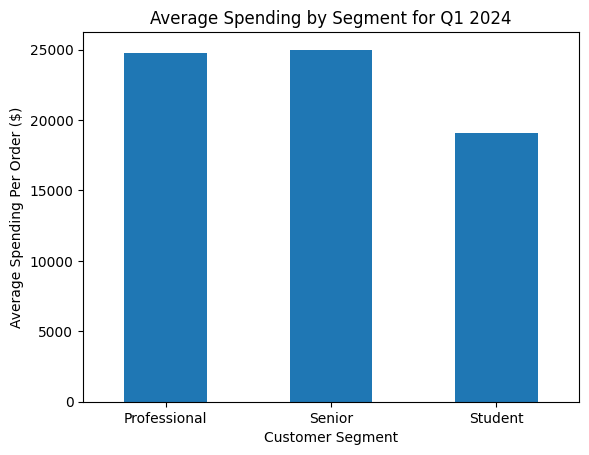

In [55]:
segment_revenue = quarter_data.groupby("customer_segment")["total_revenue"].mean()
segment_revenue.plot(kind="bar")
plt.xlabel("Customer Segment")
plt.xticks(rotation=360)
plt.ylabel("Average Spending Per Order ($)")
plt.title("Average Spending by Segment for Q1 2024")
plt.show()

In [56]:
segment_revenue.sort_values(ascending=False)

customer_segment
Senior          24987.258824
Professional    24722.242857
Student         19047.505128
Name: total_revenue, dtype: float64

### 4. Regional Trends
Which region generated the highest revenue? Which region had the highest average order size?

**The South generated the highest total revenue with the West generating the least. However, while the South also had the highest average order size, the West had the second highest average order size, with the North generating the lowest average order size. This implies that West orders might include cheaper items. Investigating this pattern further could provide useful details for increasing order quantity and orders of more expensive items to boost revenue in low yield regions.** 

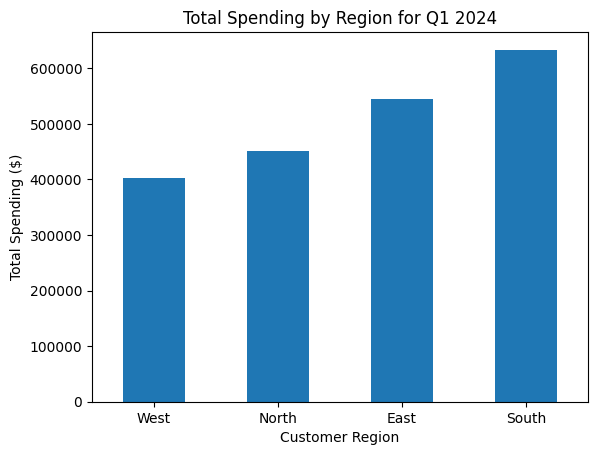

** Total Spending by Region **
region
West     403175.45
North    451544.70
East     544703.05
South    633491.40
Name: total_revenue, dtype: float64


In [57]:
q1_region_data1 = quarter_data.groupby("region")["total_revenue"].sum().sort_values()
q1_region_data1.plot(kind="bar")
plt.xlabel("Customer Region")
plt.xticks(rotation=360)
plt.ylabel("Total Spending ($)")
plt.title("Total Spending by Region for Q1 2024")
plt.show()

print("** Total Spending by Region **")
print(q1_region_data1)

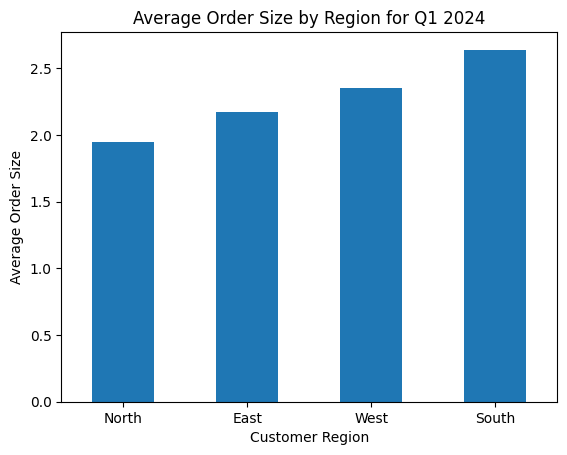

** Average Order Size by Region **
region
North    1.950000
East     2.172414
West     2.352941
South    2.640000
Name: quantity, dtype: float64


In [58]:
q1_region_data2 = quarter_data.groupby("region")["quantity"].mean().sort_values()
q1_region_data2.plot(kind="bar")
plt.xlabel("Customer Region")
plt.xticks(rotation=360)
plt.ylabel("Average Order Size")
plt.title("Average Order Size by Region for Q1 2024")
plt.show()

print("** Average Order Size by Region **")
print(q1_region_data2)

### 5. Product Category Performance
Which product category is most popular by quantity vs. by revenue?

**Sports is the most popular category by quantity in Q1 2024, while Home is the most popular by median revenue.**

In [59]:
count_popularity = quarter_data.groupby("product_category")["quantity"].count().sort_values(ascending=False)
count_popularity

product_category
Sports         22
Home           20
Electronics    20
Clothing       16
Books          13
Name: quantity, dtype: int64

In [60]:
revenue_popularity = quarter_data.groupby("product_category")["total_revenue"].median().sort_values(ascending=False)
revenue_popularity

product_category
Home           27911.10
Electronics    18780.00
Sports         16367.85
Books          12477.00
Clothing        9325.80
Name: total_revenue, dtype: float64

In [61]:
popularity = pd.concat([revenue_popularity, count_popularity], axis=1, join='outer')
popularity["average_price"] = popularity["total_revenue"] / popularity["quantity"]
popularity["average_price"].sort_values(ascending=False)

product_category
Home           1395.555000
Books           959.769231
Electronics     939.000000
Sports          743.993182
Clothing        582.862500
Name: average_price, dtype: float64

### 6. Discount Effectiveness
Do discounted orders generate higher or lower revenue per order compared to non-discounted orders?

**Discounts of 5, 15, and 10 percent are correlated with the highest revenue per order. No discount provides the median average order price. The highest discounts of 30, 25, 20 percents result in the lowest revenues. This suggests that moderate discounts can lead to increased revenue from the baseline of no discounts, while high discounts can lead to a loss of revenue.**

**On average, discounts lead to higher revenue by $535.68 per order**


In [62]:
quarter_data.groupby("discount_applied")["total_revenue"].mean().sort_values(ascending=False)

discount_applied
5     29471.945000
15    28860.050000
10    26337.375000
0     22045.390244
30    17199.636364
25    15450.321429
20     9421.600000
Name: total_revenue, dtype: float64

In [63]:
no_discount_filter = quarter_data["discount_applied"] == 0
no_discount_average_revenue = quarter_data[no_discount_filter]["total_revenue"].mean()
discount_average_revenue = quarter_data[~no_discount_filter]["total_revenue"].mean()
difference = abs(discount_average_revenue - no_discount_average_revenue)

if discount_average_revenue > no_discount_average_revenue:
    print(f"On average, discounts lead to higher revenue by ${difference:,.2f} per order")
elif discount_average_revenue < no_discount_average_revenue:
    print(f"On average, discounts lead to lower revenue by ${difference:,.2f} per order")
else:
    print(f"The presence of absence of discounts does not affect revenue")

On average, discounts lead to higher revenue by $535.68 per order


### 7. Payment Method Usage
What percentage of orders use each payment method? Does any payment method correlate with higher spending?

**Credit Cards and Gift Cards are correlated with more purchases. Debit Cards are correlated with the least number of orders.**

payment_method
Debit Card     0.219780
PayPal         0.241758
Gift Card      0.252747
Credit Card    0.285714
Name: order_id, dtype: float64


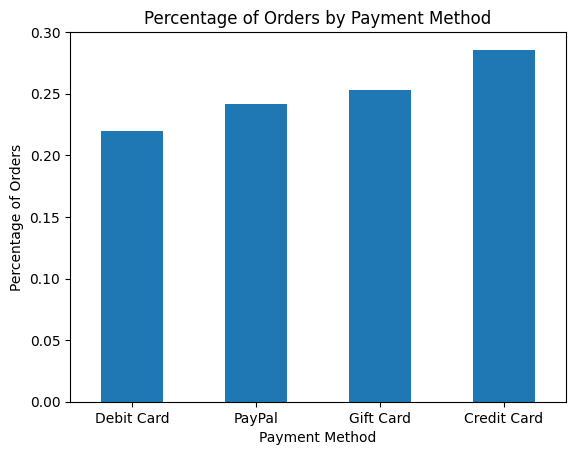

In [64]:
payment_percentages = (quarter_data.groupby("payment_method")["order_id"].count()/len(quarter_data)).sort_values()
print(payment_percentages)
payment_percentages.plot(kind="bar")
plt.xticks(rotation=360)
plt.xlabel("Payment Method")
plt.ylabel("Percentage of Orders")
plt.title("Percentage of Orders by Payment Method")
plt.show()

### 8. Seasonality Check
Plot revenue by day of week — are weekends busier than weekdays?

**That data does not demonstrate a relationship between day weekend versus weekday and revenue.**

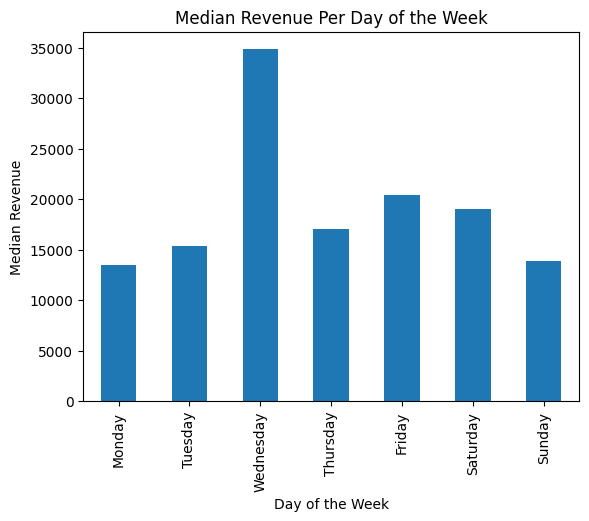

In [65]:
quarter_data.groupby("day_of_week")["total_revenue"].median().reindex(["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]).plot(kind="bar")
plt.xlabel("Day of the Week")
plt.ylabel("Median Revenue")
plt.title("Median Revenue Per Day of the Week")
plt.show()

### 9. Profitability (Stretch)
Assume profit margin = 20% of revenue. Estimate total profit and identify the most profitable region.

Estimated total profit: $406,582.92


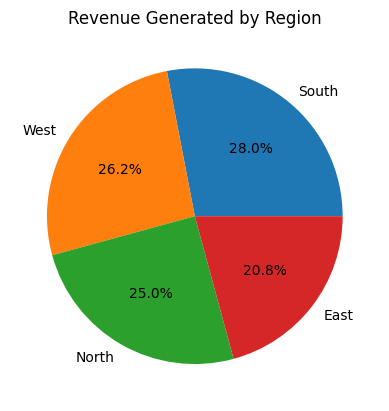

In [66]:
profit_margin = 0.2
quarter_data["estimated_profit"] = quarter_data["total_revenue"] * profit_margin
print(f"Estimated total profit: ${quarter_data["estimated_profit"].sum():,.2f}")
regional_revenue = quarter_data.groupby("region")["total_revenue"].mean().sort_values(ascending=False)
regional_revenue.plot(kind="pie", autopct='%1.1f%%')
plt.title("Revenue Generated by Region")
plt.ylabel(None)
plt.show()

### 10. Business Recommendation
Based on your findings, recommend one strategy (e.g., focus on certain customer segments, increase discounts, promote specific regions/products).

Based on the above analysis, the business could benefit from taking the following three actions:
1. Use discounts of 5, 10, and 15 percent, corresponding to \$7,426.55, \$6,814.66, and \$4,291.98 revenue increases. Avoid high discount percentages such as 30, 25, 20 which are correlated with losses of \$4,845.75, \$6,595.07, and \$12,623.79, respectively.
2. Work to increase revenue in the North, East, and particularly the West (which saw only 63% the amount of revenue of the highest yielding South region). Start by conducting detailed, region-specific customer research, which may reveal insights that may improve effectiveness of processes including marketing in those areas.
3. Attempt to promote engage with the Student segment, which has demonstrated 23% lower median spending compared to other customer segments, through initiatives such as student discounts and experimenting with advertising techniques (partnering with social media influencers, sponsoring various initiatives that are important to students, etc.).

---

## Submission Requirements

1. **Complete code** for all 10 questions
2. **Clear visualizations** where appropriate  
3. **Brief interpretation** of each result
4. **Final business recommendation** with supporting data

Remember: Focus on what the numbers tell us about the business, not just the calculations themselves.